In [11]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import Amazon_datacleaning as cl
import Amazon_counting as counting
import table_visualize as tv
from table_visualize import chinese_font

In [13]:
chinese_font()

In [14]:
# 讀取數據
df = pd.read_csv('C:/python-training/爬蟲/0530_Aamazon_sunglasses+men/Amazon商品資料_sunglasses+men_加月銷量.csv')

In [15]:
# 清理資料
cl.clean_price(df)
cl.clean_star(df)
cl.clean_monthly_sales(df)

0       2000
1        200
2        200
3        100
4      10000
       ...  
185       50
186      300
187        0
188      700
189      100
Name: 過去一個月銷量, Length: 190, dtype: int32

In [16]:
# 計算 "加權評分" (星星評分X評分數得)

top_brands_rated = counting.star_comment_count(df)
# 對 DataFrame 根據加權評分，進行排序
top_brands_rated_sorted = top_brands_rated.sort_values(by='加權評分', ascending=False).head(10)
print("Top 10 品牌 (根據評分數多且評分高)")
print(top_brands_rated_sorted)

Top 10 品牌 (根據評分數多且評分高)
        品牌名稱      加權評分
73   SUNGAIT  845797.0
38  KALIYADI  588891.8
18      DUCO  460084.4
51   MERRY'S  416499.4
35       J+S  404823.5
66   Ray-Ban  208925.8
56  Nitrogen  151351.2
57    Oakley  146701.0
25    FAGUMA  104566.0
10    CARFIA   74640.3


In [17]:
# 計算 " (星星評分X評分數得)

top_brands_sales = counting.star_comment_count(df)
# 對 DataFrame 根據加權評分，進行排序
top_brands_sales_sorted = top_brands_sales.sort_values(by='過去一個月銷量', ascending=False).head(10)
print("Top 10 品牌 (根據過去一個月銷量高)")
print(top_brands_sales_sorted)

KeyError: '過去一個月銷量'

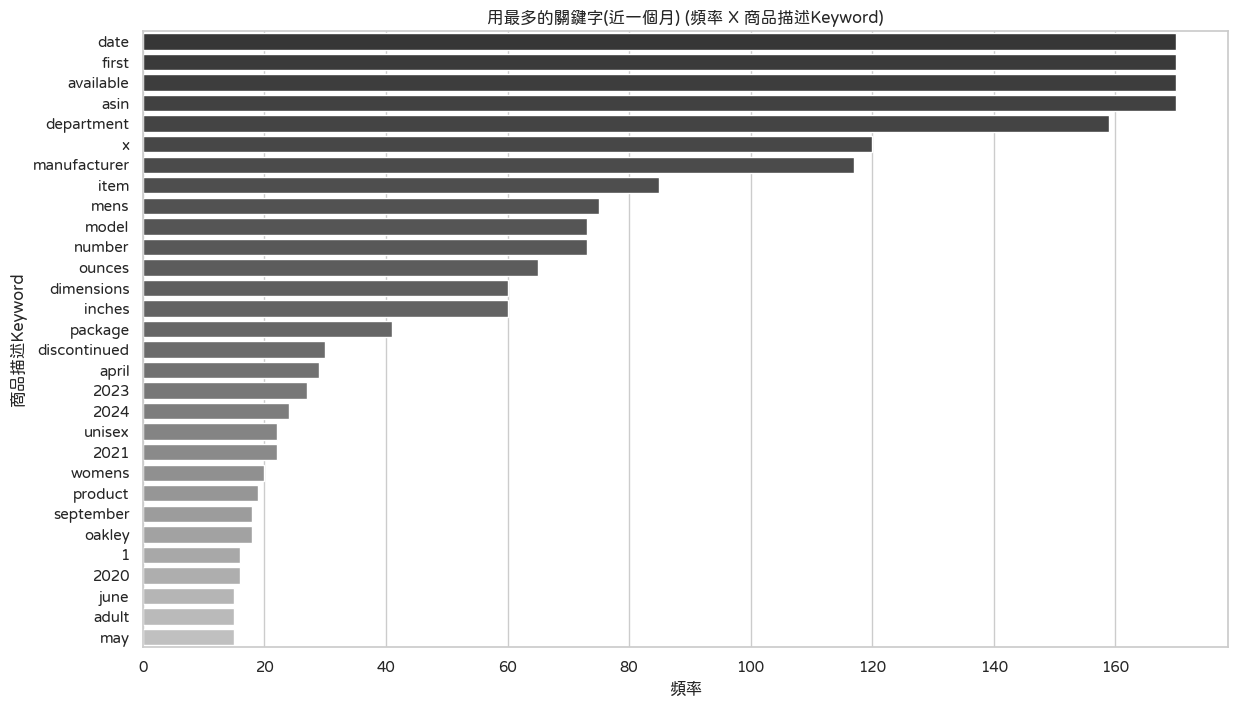

In [ ]:
# 計算 "關鍵字" 出現頻率

common_words_df = counting.count_words(df, '商品描述').head(30)
# print(common_words_df)
input_text = '商品描述'
tv.two_d_bar_plot(data=common_words_df, x='頻率', y=f'{input_text}Keyword', color="Grays_d", title='用最多的關鍵字(近一個月)')

# 分析關鍵字與銷量的關係

In [ ]:
print(df['過去一個月銷量'])

0       2000
1        200
2        200
3        100
4      10000
       ...  
185       50
186      300
187        0
188      700
189      100
Name: 過去一個月銷量, Length: 190, dtype: int32


In [ ]:
# 1. 過去一個月銷量 土法煉鋼計算
bysalesCount, recently_use = counting.analyze_keywords_and_sales(df, input_text='商品描述', target='過去一個月銷量', top_n_keywords=30)
# keywords_set_1 = set(keywordsXsales['標題關鍵字'])
# keywords_set_2 = set(recently_use_df['標題關鍵字'])
# 繪製圖表
target='過去一個月銷量'
input_text='商品描述'
tv.two_d_bar_plot(data=bysalesCount, x=f'{target}/關鍵字出現次數', y=f'{input_text}Keyword', color="BuGn_d", title='賣最好的關鍵字(近一個月)')
tv.two_d_bar_plot(data=recently_use, x=target, y=f'{input_text}Keyword', color="BuGn_d", title='過去一個月常見關鍵字(近一個月)')

TypeError: expected string or bytes-like object, got 'float'

In [ ]:
# 2. 加權評分 土法煉鋼計算
byscoreCount, high_score_use = counting.analyze_keywords_and_sales(df, input_text='商品描述', target='加權評分', top_n_keywords=30)

# 繪製圖表
target='加權評分'
# 評分不會因為更多間就比較好
# tv.two_d_bar_plot(data=byscoreCount, x=f'{target}/關鍵字出現次數', y=f'{input_text}Keyword', color="BuGn_d", title='賣最好的關鍵字')
tv.two_d_bar_plot(data=high_score_use, x=target, y=f'{input_text}Keyword', color="YlOrRd_d", title='評分好的常見關鍵字')

In [ ]:
# 3. 過去一個月銷量 TF-IDF 分析 (小數據)
bysalesTFIDF_S = counting.tf_idf_analysis(df, input_text='商品描述', target_column='過去一個月銷量', top_n_keywords=30)

input_text='商品描述'
target_column='過去一個月銷量'
# 繪製圖表
tv.two_d_bar_plot(data=bysalesTFIDF_S, x=f'{target_column}權重', y=f'{input_text}Keyword', color="BuGn_d", title='TF-IDF 小數據 (精準)')

In [ ]:
# 過去一個月銷量 TF-IDF 分析 (大數據)
bysalesTFIDF_B = counting.tf_idf_analysis(df, input_text='商品描述', target_column='過去一個月銷量', top_n_keywords=30, max_features=100)

input_text='商品描述'
target_column='過去一個月銷量'
# 繪製圖表
tv.two_d_bar_plot(data=bysalesTFIDF_B, x=f'{target_column}權重', y=f'{input_text}Keyword', color="BuGn_d", title='TF-IDF 大數據 (效率)')

In [ ]:
# 加權評分 TF-IDF 分析 (大數據)
byscoreTFIDF_B = counting.tf_idf_analysis(df, input_text='商品描述', target_column='加權評分', top_n_keywords=30, max_features=100)

# keywords_set_a = set(byscoreTFIDF_B['商品描述 關鍵字'])
# print(keywords_set_a)

input_text='商品描述'
target_column='加權評分'
# 繪製圖表
tv.two_d_bar_plot(data=byscoreTFIDF_B, x=f'{target_column}權重', y=f'{input_text}Keyword', color="YlOrRd_d", title='TF-IDF 大數據 (效率)')

In [ ]:
# 加權評分 TF-IDF 分析 (小數據)
byscoreTFIDF_S = counting.tf_idf_analysis(df, input_text='商品描述', target_column='加權評分', top_n_keywords=30)

# keywords_set_b = set(tf_idf_S_return['商品描述 關鍵字'])
# print(keywords_set_b)

input_text='商品描述'
target_column='加權評分'
# 繪製圖表
tv.two_d_bar_plot(data=byscoreTFIDF_S, x=f'{target_column}權重', y=f'{input_text}Keyword', color="YlOrRd_d", title='TF-IDF 小數據 (精準)')

In [ ]:
bysalesCount_set = set(bysalesCount['商品名稱Keyword'])
recently_use = set(recently_use['商品名稱Keyword'])
bysalesTFIDF_S = set(bysalesTFIDF_S['商品名稱Keyword'])
tv.plot_venn_diagram(bysalesCount_set, recently_use, bysalesTFIDF_S, title="過去一個月銷量の關鍵字交集圖", label=('高效', '常見', '產業')) # 